# Capstone 2: Male vs Female Suicides 

Does gender affect suicide rates? Throughout the years, suicides are getting more exposure due to the growth of social media. It has a huge impact on everyone's lives. There are many factors in why suicides happen. It is very complicated to pinpoint a solution what impact suicide rates. 


Hypothesis: Males are more likely to commit suicide than females.
Null: Both males and females have the same chance to commit suicide.

The dataset was pulled from four other datasets. The dataset was used from Kaggle. This is the link to the dataset.https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016/download. Data were collected from the United Nations Development Program, World Bank, and World Health Organization. The timeline in the dataset is from 1985 to 2016. This dataset shows the number of suicides that were recorded from each country from each year. They have the total numbers of each sex, male and female. Male and female suicides would be compared with each other.  

In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats


In [2]:
df = pd.read_csv('master.csv' , delimiter=',')
df.head()
#HDI= Human Develop Index

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [24]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [9]:
df.groupby("sex").sum()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
sex,,,,,,
female,27837504,1559510,26272781857,75014.77,3247.746,234612520
male,27837504,5188910,25049376579,281529.06,3247.746,234612520


In [11]:
print('Female sample size:', 26272781857)
print('Male sample size:', 25049376579)
print('test proportion:', 26272781857/25049376579)

Female sample size: 26272781857
Male sample size: 25049376579
test proportion: 1.0488397495299597


In [12]:
print('female suicide rate:=', 1559510/26272781857)
print('male suicide rate:=', 5188910/250493765)

female suicide rate:= 5.9358388787614865e-05
male suicide rate:= 0.020714727170953736


In [13]:
df.groupby("sex").mean()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
sex,,,,,,
female,2001.258375,112.114306,1.888769e+06,5.392866,0.776601,16866.464414
male,2001.258375,373.034508,1.800818e+06,20.239329,0.776601,16866.464414


In [14]:
df.groupby("sex").std()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
sex,,,,,,
female,8.469207,333.491224,3.971091e+06,7.358993,0.093372,18887.915954
male,8.469207,1217.448508,3.851195e+06,23.552754,0.093372,18887.915954


In [23]:
from __future__ import print_function


from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
t2, p2 = ttest_ind_from_stats(112.114306, np.sqrt(333.491224), 26272781857,
                              373.034508, np.sqrt(1217.448508), 25049376579,
                              equal_var=False)
print("ttest_ind_from_stats: t = %g  p = %g" % (t2, p2))

ttest_ind_from_stats: t = -1.05389e+06  p = 0


The groups are not significanlty different because the t-value is negative. So the two groups have no bearing between each other. So they are other factors that contribute with suicide rates. The p-value is 0. So there is a failure to reject the null hypothesis. So the course of action is to look at other sources that have suicide datasets. 

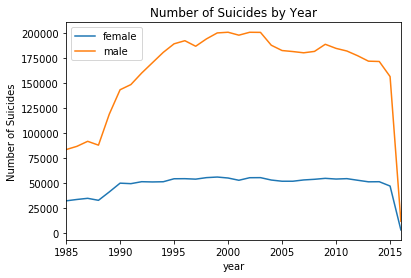

In [26]:
fig = df[df.sex=="female"][
    ['year', 'suicides_no']].groupby('year').sum().plot()
df[df.sex=="male"][
    ['year', 'suicides_no']].groupby('year').sum().plot(ax=fig)
plt.legend(['female','male'])
plt.ylabel('Number of Suicides')
plt.title('Number of Suicides by Year')
plt.show()

In [ ]:
There are more male suicides than female suicides shown in this line graph. 

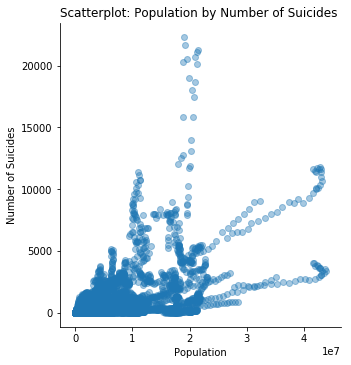

In [32]:
g = sns.lmplot(y='suicides_no', 
               x='population', 
               data=df, 
               fit_reg=False, 
               scatter_kws={'alpha':0.4}) 
g.set_ylabels("Number of Suicides")
g.set_xlabels("Population")
plt.title('Scatterplot: Population by Number of Suicides ')
plt.show()


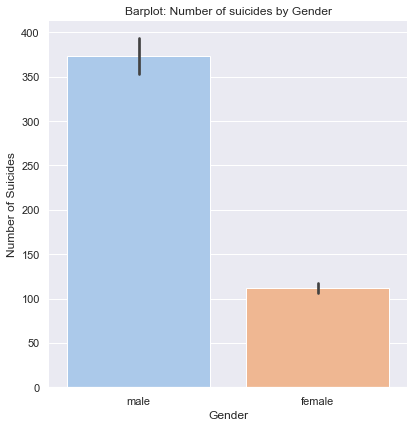

In [36]:
# Setting the overall aesthetic.
sns.set(style="darkgrid")

# Use catplot (previous versions of seaborn use factorplot)
g = sns.catplot(x="sex", y="suicides_no",  data=df,
                   height=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Number of Suicides")
g.set_xlabels("Gender")
plt.title('Barplot: Number of suicides by Gender')
plt.show()

Bar plot shows there more male suicides than female suicides. 

# Rollout Plan

The dataset that was chosen came from four different datasets. This would cause some bias on how the organization collected its data. One complaint is the GDP was for the whole country and not specific for each gender. According to the t-test, the two groups showed no difference between each other. So that means they are other factors that affect suicide rates. The type of jobs for male and female would be useful to collect. Also the status of the person who pass away could show some intersting patterns. More data collected on mental health clinics would assist this experiment. Also, the dataset was too broad to under the patterns because of many factors. One example, every country has different cultures from each other. By going micro to research the data in smaller areas and group countries that have similar values to a pattern in more an efficient way. 

# Evaluation Plan

Once all the data is collected. In order to evaluate the data to show success, to make clear as much bias to get the objective of the experiment. The A/B test would be use to prove the hypothesis or not. The A/B test would show if gender affect suicde rates. P-value of less than .05 is good and greater than .05 is bad. The p-value would be determine by the t-test. 